In [1]:
# Configuring the dust map; Run only once
from dustmaps.config import config
config['data_dir'] = '../data/dustmaps'

import dustmaps.bayestar
dustmaps.bayestar.fetch(version='bayestar2017')

Checking existing file to see if MD5 sum matches ...
File exists. Not overwriting.


In [2]:
from astropy.coordinates import SkyCoord
from dustmaps.bayestar import BayestarQuery
import pandas as pd
import astropy.units as units
bayestar = BayestarQuery(max_samples=None, version='bayestar2017')


Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 52.782 s
  pix_info:   0.552 s
   samples:  43.238 s
      best:   3.001 s
       nan:   0.552 s
      sort:   5.240 s
       idx:   0.199 s


In [3]:
from dustmaps.bayestar import BayestarWebQuery
bayestarweb = BayestarWebQuery(version='bayestar2017')

In [7]:
# import the distances
# df_bj21 = pd.read_csv('../data/SMSS88_BJ21_dist.csv',skip_blank_lines=True,comment='#',sep=';')
# df_EBV = pd.read_csv('../data/SMSS88_EBV.csv',comment='#',delim_whitespace=True)
df_bj21 = pd.read_csv('../data/rpa4_BJ21_dist.csv',skip_blank_lines=True,comment='#',sep=';')
df_EBV = pd.read_csv('../data/rpa4_EBV.csv',comment='#',delim_whitespace=True)


df_bj21.head()

,Source,RA_ICRS,DE_ICRS,rgeo,b_rgeo,B_rgeo,rpgeo,b_rpgeo,B_rpgeo,Flag
0,3636133400286350976,199.945846,-4.386206,4216.35791,3847.98975,4666.08838,4187.43115,3872.11450,4679.99072,10033
1,6626606295405710848,334.784807,-23.563061,2406.14844,2324.28638,2504.76660,2427.03174,2314.10669,2540.38623,10033


In [8]:
coords = SkyCoord(df_bj21['RA_ICRS']*units.deg, df_bj21['DE_ICRS']*units.deg,
                  distance=df_bj21['rpgeo']*units.pc, frame='icrs')
ebv = bayestar(coords, mode='median')
ebvweb = bayestarweb(coords, mode='median')
diff = ebvweb*0.981-ebv*0.981

print(ebv*0.981,ebvweb*0.981)
# print(df_bj21['DE_ICRS'].values)
print(diff)

[0.01701054 0.05618678] [0.01696149 0.06265647]
[-4.9050897e-05  6.4696930e-03]


In [19]:
print(df_bj21['Flag'].values)
# Flags suggest all values are fine

[10033 10033 10033 10033 10033 10033 10033 10033 10033 10033 10033 10033
 10033 10033 10033 10033 10033 10033 10033 10033 10033 10033 10033 10033
 10033 10033 10033 10033 10033 10033 10033 10033 10033 10033 10033 10033
 10033 10033 10033 10033 10033 10033 10033 10033 10033 10033 10033 10033
 10033 10033 10033 10033 10033 10033 10033 10133 10033 10033 10033 10033
 10033 10033 10033 10033 10033 10033 10033 10033 10033 10033 10033 10033
 10033 10033 10033 10033 10033 10033 10033 10133 10033 10033 10033 10033
 10033 10033 10033 10033]


In [9]:
df_EBV3D = df_bj21.loc[:,['RA_ICRS','DE_ICRS']]
df_EBV3D['EBV3D'] = ebv*0.981
df_EBV3D['EBV3Dweb'] = ebvweb*0.981

In [10]:
df_EBV3D

,RA_ICRS,DE_ICRS,EBV3D,EBV3Dweb
0,199.945846,-4.386206,0.017011,0.016961
1,334.784807,-23.563061,0.056187,0.062656


In [11]:
# Output the result
df_EBV3D.to_csv('../data/rpa4_EBV3D.csv',index=False)

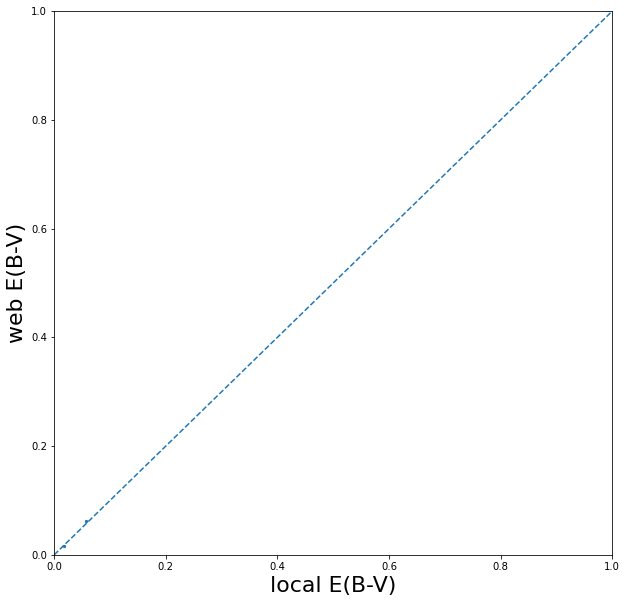

In [14]:
plt.figure(figsize=[10,10])
plt.scatter(ebv*0.981,ebvweb*0.981,s=5)
# plt.legend()
plt.plot([0,1],[0,1],ls='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('local E(B-V)',fontsize=22)
plt.ylabel('web E(B-V)',fontsize=22)
plt.show()

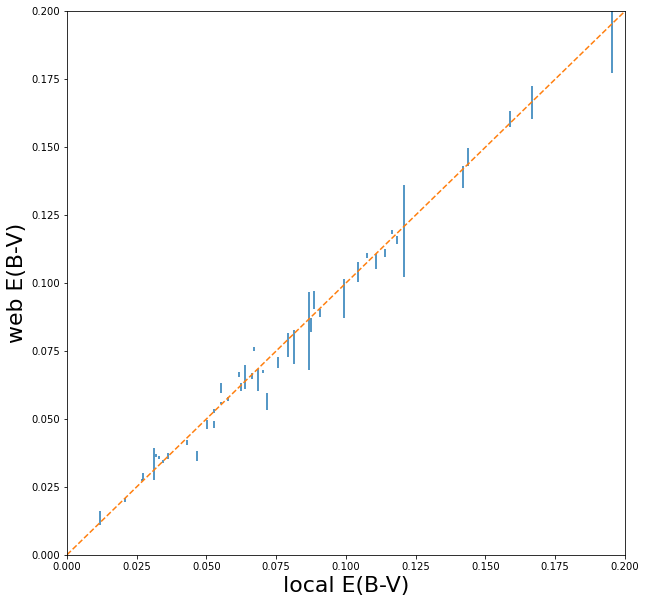

In [122]:
plt.figure(figsize=[10,10])
plt.errorbar(ebv*0.981,ebvweb*0.981,yerr=df_EBV['|stdev_E_B_V_SandF'],markersize=10,fmt='none')
# plt.legend()
plt.plot([0,1],[0,1],ls='--')
plt.xlim([0,0.2])
plt.ylim([0,0.2])
plt.xlabel('local E(B-V)',fontsize=22)
plt.ylabel('web E(B-V)',fontsize=22)
plt.show()

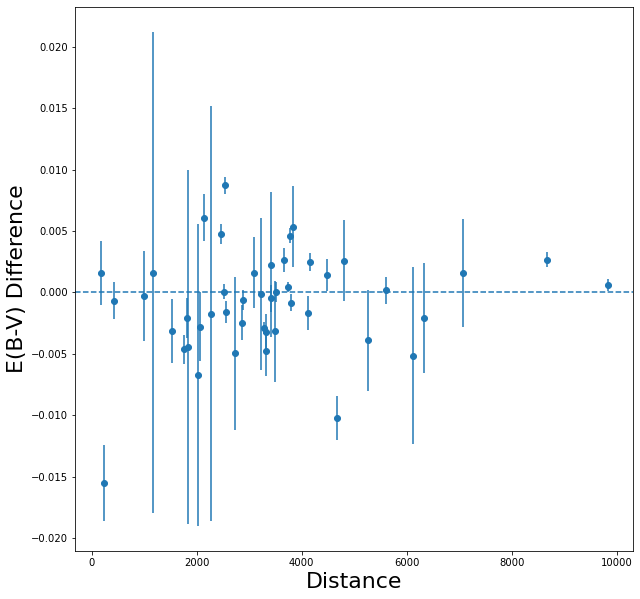

In [107]:
plt.figure(figsize=[10,10])
plt.scatter(df_bj21['rpgeo'],diff)
plt.errorbar(df_bj21['rpgeo'],diff,yerr=df_EBV['|stdev_E_B_V_SandF'],markersize=10,fmt='none')
# plt.legend()
plt.axhline(0,ls='--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.xlabel('Distance',fontsize=22)
plt.ylabel('E(B-V) Difference',fontsize=22)
plt.show()

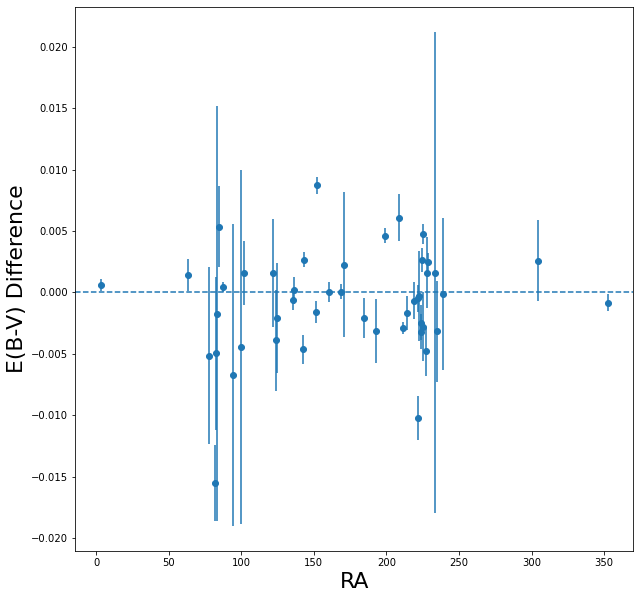

In [108]:
plt.figure(figsize=[10,10])
plt.scatter(df_bj21['RA_ICRS'],diff)
plt.errorbar(df_bj21['RA_ICRS'],diff,yerr=df_EBV['|stdev_E_B_V_SandF'],markersize=10,fmt='none')
# plt.legend()
plt.axhline(0,ls='--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.xlabel('RA',fontsize=22)
plt.ylabel('E(B-V) Difference',fontsize=22)
plt.show()

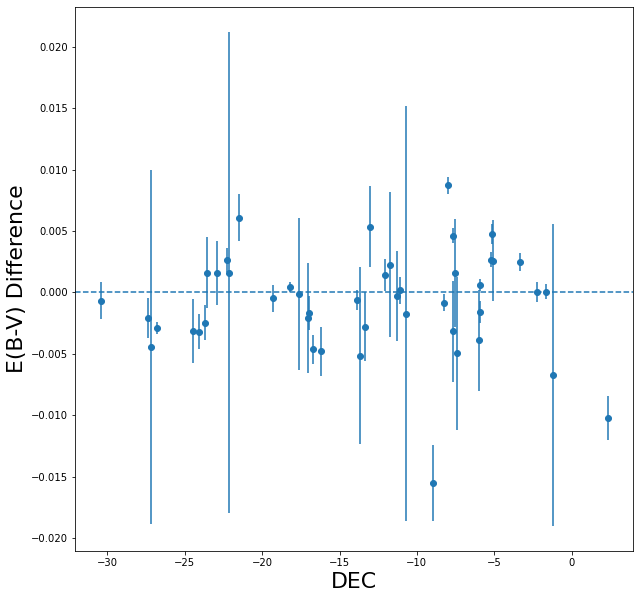

In [109]:
plt.figure(figsize=[10,10])
plt.scatter(df_bj21['DE_ICRS'],diff)
plt.errorbar(df_bj21['DE_ICRS'],diff,yerr=df_EBV['|stdev_E_B_V_SandF'],markersize=10,fmt='none')
# plt.legend()
plt.axhline(0,ls='--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.xlabel('DEC',fontsize=22)
plt.ylabel('E(B-V) Difference',fontsize=22)
plt.show()

In [71]:
# import the distances from Ian's input file
df_ian = pd.read_csv('teff_logg_updated042121/rpa.photo',delim_whitespace=True,skiprows=[1])
df_ian.head()

,#NAME,RA,DEC,RA_DEG,DEC_DEG,LONGITUDE,LATITUDE,B_TYC,EB_TYC,V_TYC,...,EBV3DP,EBV3DD,EEBVA,TEFF,LOGG,FEH,BCV,EBCV,ZP_EDR3,D_GAIA
0,2MASSJ00002259-1302275,00:00:22.500,-13:02:27.00,0.09375,-13.04083,80.12639,-71.53076,-9.999,-9.999,-9.999,...,0.0320,0.0320,0.0004,4802,1.12,-3.00,-0.458,0.099,-0.0201,1.519
1,2MASSJ00002416-1107454,00:00:24.000,-11:07:44.40,0.10000,-11.12900,83.61217,-70.00141,-9.999,-9.999,-9.999,...,0.0324,0.0324,0.0008,4826,0.81,-2.35,-0.462,0.103,-0.0356,2.734
2,2MASSJ00052681+1742058,00:05:26.810,+17:42:05.85,1.36171,17.70162,107.67713,-43.80363,11.637,0.113,10.708,...,0.0377,0.0377,0.0006,4481,1.62,-1.67,-0.600,0.128,-0.0349,0.232
3,2MASSJ00512646-1053170,00:51:26.500,-10:53:17.30,12.86042,-10.88814,122.93520,-73.75989,11.189,0.118,10.823,...,0.0250,0.0250,0.0009,6442,3.59,-1.97,-0.195,0.009,-0.0287,3.112
4,2MASSJ00532781-0253169,00:53:27.800,-02:53:17.00,13.36583,-2.88806,124.16351,-65.75496,11.445,0.101,10.347,...,0.0630,0.0630,0.0010,4370,0.56,2.16,0.000,0.000,-0.0356,0.600


In [111]:
coords = SkyCoord(ra=df_ian['RA_DEG']*units.deg, dec=df_ian['DEC_DEG']*units.deg,
                  distance=df_ian['DISTBJ']*units.pc, frame='icrs')
ebv = bayestar(coords, mode='median')

print(ebv[0:10],ebv[0:10]*0.981)
print(df_ian['EBV3DD'][0:10].values,df_ian['EBV3DP'][0:10].values)
print(abs(ebv-df_ian['EBV3DD'].values)/df_ian['EEBVA'].values)

[0.03129    0.03429    0.039165   0.02690594 0.068555   0.036395
 0.037195   0.04446    0.66782236 0.048125  ] [0.03069549 0.03363849 0.03842086 0.02639472 0.06725245 0.0357035
 0.03648829 0.04361526 0.6551337  0.04721062]
[0.032  0.0324 0.0377 0.025  0.063  0.038  0.0372 0.0444 0.6619 0.0493] [0.032  0.0324 0.0377 0.025  0.063  0.038  0.0372 0.0444 0.6619 0.0493]
[1.77500390e+00 2.36250100e+00 2.44166273e+00 2.11770584e+00
 5.55499744e+00 8.91667538e-01 9.99840498e-03 2.99993038e-02
 5.33546035e-01 2.21698338e-01 3.28313219e+00 1.53500024e+01
 9.78571423e-01 1.18749864e+00 2.43477334e-01 3.06251451e-01
 1.62000018e+01 1.31152477e+01            nan 2.60850157e+00
 7.00002988e-01 2.59127393e+00 1.08000028e+00 1.47390286e-01
 1.37089751e+00 1.12500306e-01 8.30528921e-01 1.21431806e+00
 6.84615605e-01 1.63611182e+00 5.05356291e-01 2.73682865e-01
 3.73333398e+00 7.87076388e-01 2.29999687e+00 3.15145153e-01
 2.54177468e+00 6.77376456e-01            nan 3.08255419e+00
            nan 2.34684

In [112]:
diff = df_ian['EBV3DD'] - ebv*0.981

In [13]:
import matplotlib.pyplot as plt

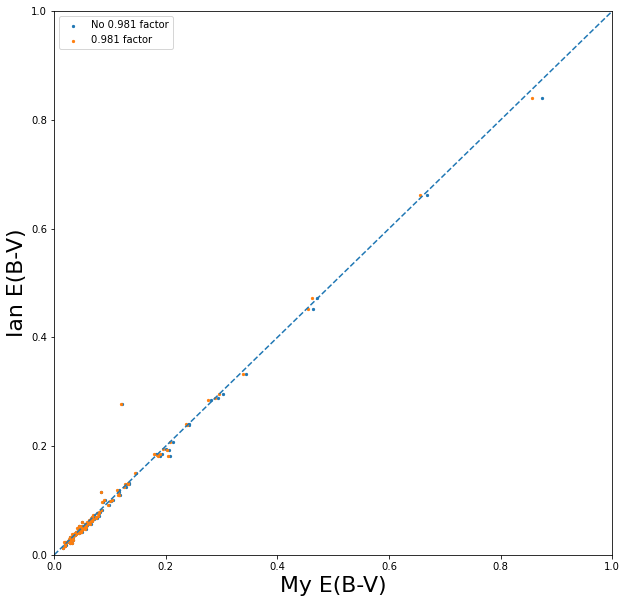

In [113]:
plt.figure(figsize=[10,10])
plt.scatter(ebv,df_ian['EBV3DD'],s=5,label='No 0.981 factor')
plt.scatter(ebv*0.981,df_ian['EBV3DD'],s=5,label='0.981 factor')
plt.legend()
plt.plot([0,1],[0,1],ls='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('My E(B-V)',fontsize=22)
plt.ylabel('Ian E(B-V)',fontsize=22)
plt.show()

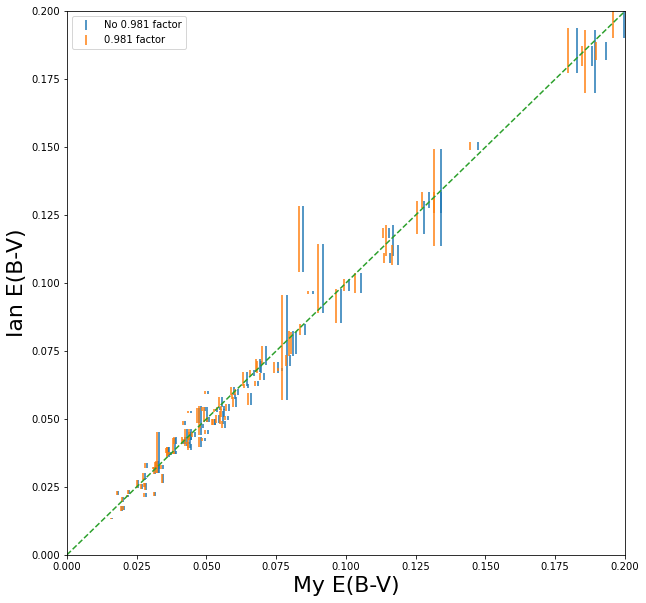

In [114]:
plt.figure(figsize=[10,10])
plt.errorbar(ebv,df_ian['EBV3DD'],yerr=df_ian['EEBVA'],markersize=10,fmt='none',label='No 0.981 factor')
plt.errorbar(ebv*0.981,df_ian['EBV3DD'],yerr=df_ian['EEBVA'],markersize=10,fmt='none',label='0.981 factor')
plt.legend()
plt.plot([0,1],[0,1],ls='--')
plt.xlim([0,0.2])
plt.ylim([0,0.2])
plt.xlabel('My E(B-V)',fontsize=22)
plt.ylabel('Ian E(B-V)',fontsize=22)
plt.show()

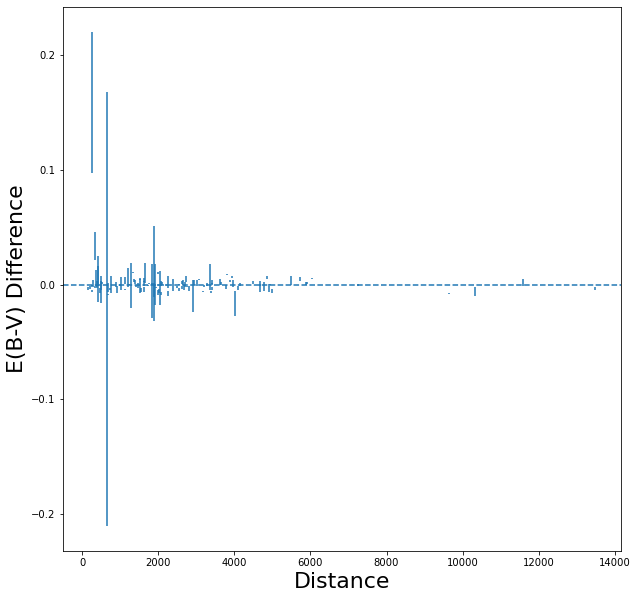

In [116]:
plt.figure(figsize=[10,10])
# plt.scatter(df_ian['DISTBJ'],diff)
plt.errorbar(df_ian['DISTBJ'],diff,yerr=df_ian['EEBVA'],markersize=10,fmt='none')
# plt.legend()
plt.axhline(0,ls='--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.xlabel('Distance',fontsize=22)
plt.ylabel('E(B-V) Difference',fontsize=22)
plt.show()

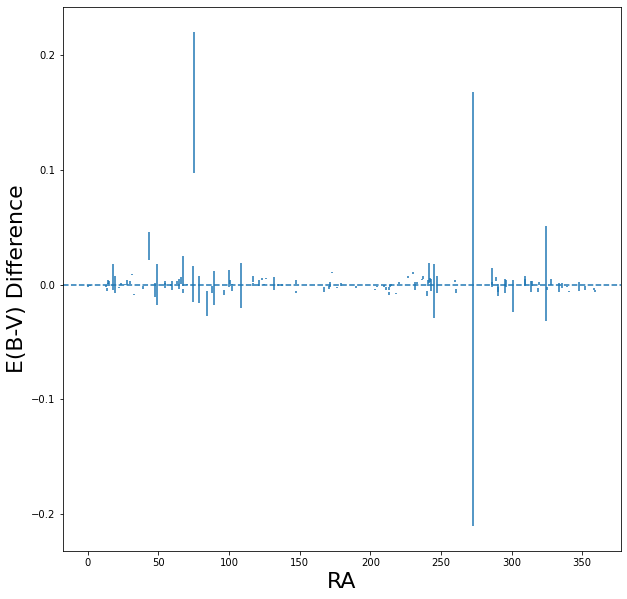

In [117]:
plt.figure(figsize=[10,10])
# plt.scatter(df_ian['RA_DEG'],diff)
plt.errorbar(df_ian['RA_DEG'],diff,yerr=df_ian['EEBVA'],markersize=10,fmt='none')
# plt.legend()
plt.axhline(0,ls='--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.xlabel('RA',fontsize=22)
plt.ylabel('E(B-V) Difference',fontsize=22)
plt.show()

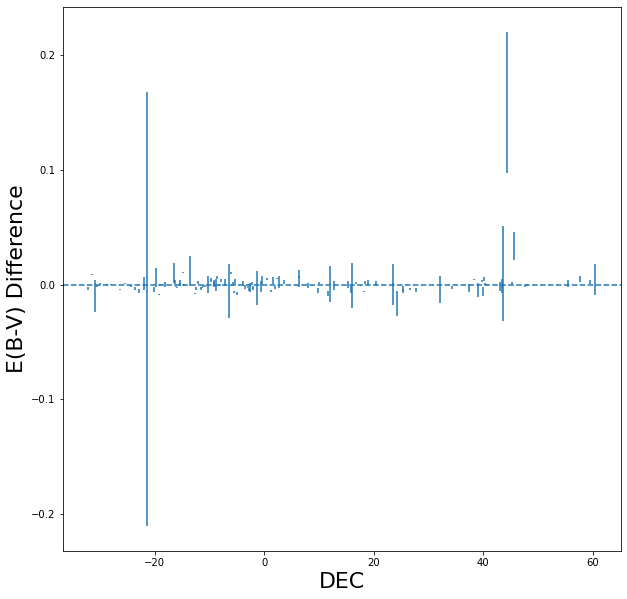

In [119]:
plt.figure(figsize=[10,10])
# plt.scatter(df_ian['DEC_DEG'],diff)
plt.errorbar(df_ian['DEC_DEG'],diff,yerr=df_ian['EEBVA'],markersize=10,fmt='none')
# plt.legend()
plt.axhline(0,ls='--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.xlabel('DEC',fontsize=22)
plt.ylabel('E(B-V) Difference',fontsize=22)
plt.show()

In [87]:
ebv = bayestarweb(coords, mode='median')
diff = df_ian['EBV3DD'] - ebv*0.981

In [88]:
print(ebv[0:10],ebv[0:10]*0.981)
print(df_ian['EBV3DD'][0:10].values,df_ian['EBV3DP'][0:10].values)
print(abs(ebv-df_ian['EBV3DD'].values)/df_ian['EEBVA'].values)

[0.03257    0.03306    0.03841    0.02546057 0.06425    0.03876
 0.03793    0.04526    0.6747403  0.05021   ] [0.03195117 0.03243186 0.03768021 0.02497682 0.06302925 0.03802356
 0.03720933 0.04440006 0.66192025 0.04925601]
[0.032  0.0324 0.0377 0.025  0.063  0.038  0.0372 0.0444 0.6619 0.0493] [0.032  0.0324 0.0377 0.025  0.063  0.038  0.0372 0.0444 0.6619 0.0493]
[1.42500184 0.82499918 1.18333417 0.51174561 1.24999982 0.42222165
 1.46000115 0.43000049 1.15678509 0.17169794 0.65696928 1.30000023
 1.47142733 0.97499877 0.57391291 0.71249903 2.11999983 0.61815466
        nan 0.4103797  1.8000005  0.18209539 0.28529179 0.14068976
 1.30881735 0.46250058 0.59000183 0.96173532 0.43846199 0.42777872
 0.37142803 0.85195582 0.44478016 0.15079571 2.5999945  0.34918499
 0.08720637 0.29690651        nan 1.50366578        nan 1.06530812
 0.59305475        nan 0.64317828 0.09698016 0.6065659  1.68311728
 0.5888604         nan        nan 0.07807377 1.0818197  0.35687543
 0.51474503 0.65564262 0.91428

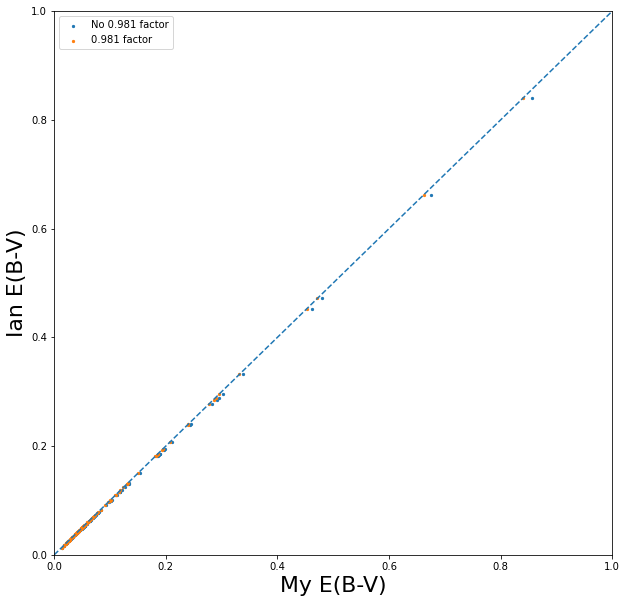

In [89]:
plt.figure(figsize=[10,10])
plt.scatter(ebv,df_ian['EBV3DD'],s=5,label='No 0.981 factor')
plt.scatter(ebv*0.981,df_ian['EBV3DD'],s=5,label='0.981 factor')
plt.legend()
plt.plot([0,1],[0,1],ls='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('My E(B-V)',fontsize=22)
plt.ylabel('Ian E(B-V)',fontsize=22)
plt.show()

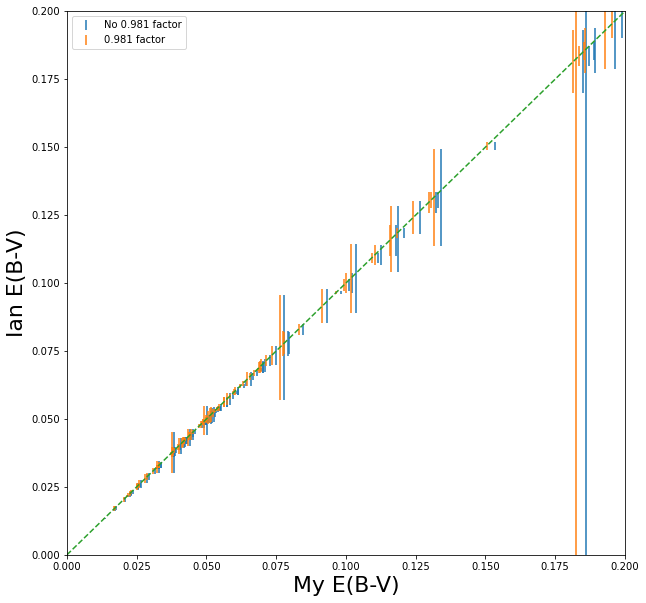

In [90]:
plt.figure(figsize=[10,10])
plt.errorbar(ebv,df_ian['EBV3DD'],yerr=df_ian['EEBVA'],markersize=10,fmt='none',label='No 0.981 factor')
plt.errorbar(ebv*0.981,df_ian['EBV3DD'],yerr=df_ian['EEBVA'],markersize=10,fmt='none',label='0.981 factor')
plt.legend()
plt.plot([0,1],[0,1],ls='--')
plt.xlim([0,0.2])
plt.ylim([0,0.2])
plt.xlabel('My E(B-V)',fontsize=22)
plt.ylabel('Ian E(B-V)',fontsize=22)
plt.show()

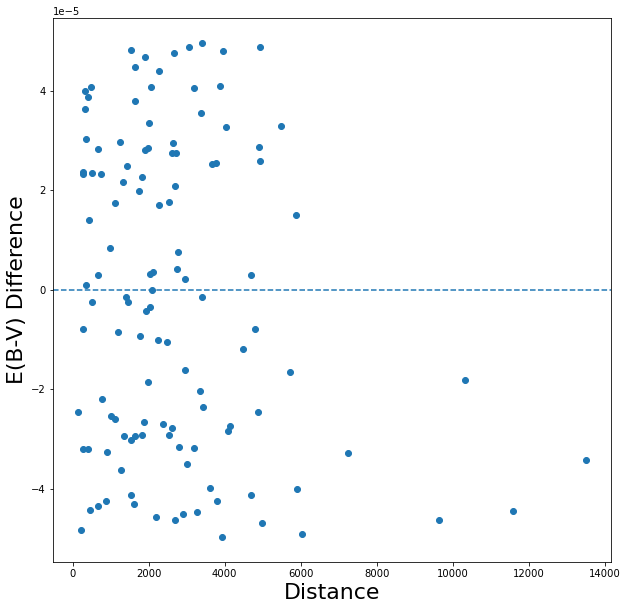

In [91]:
plt.figure(figsize=[10,10])
plt.scatter(df_ian['DISTBJ'],diff)
# plt.legend()
plt.axhline(0,ls='--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.xlabel('Distance',fontsize=22)
plt.ylabel('E(B-V) Difference',fontsize=22)
plt.show()

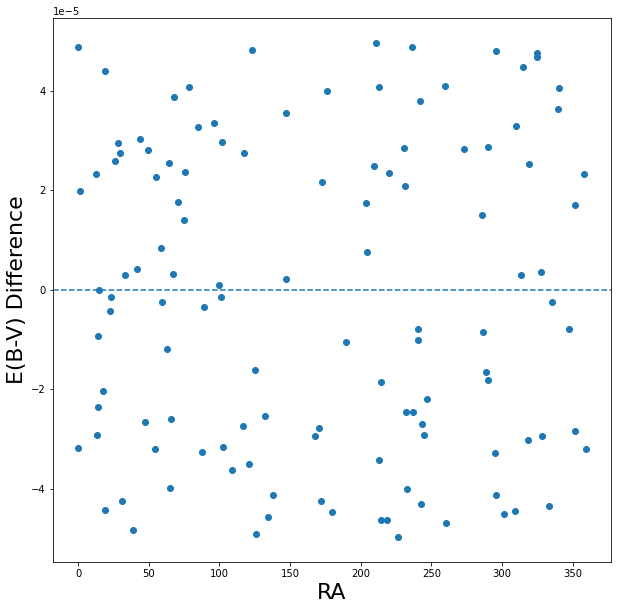

In [92]:
plt.figure(figsize=[10,10])
plt.scatter(df_ian['RA_DEG'],diff)
# plt.legend()
plt.axhline(0,ls='--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.xlabel('RA',fontsize=22)
plt.ylabel('E(B-V) Difference',fontsize=22)
plt.show()

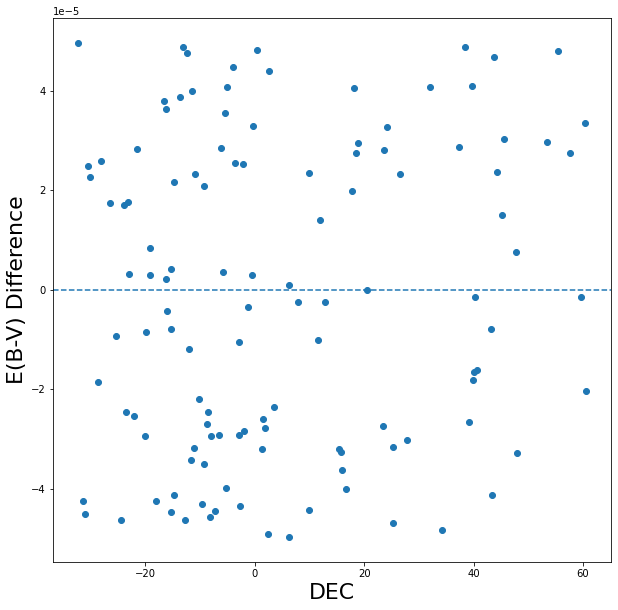

In [93]:
plt.figure(figsize=[10,10])
plt.scatter(df_ian['DEC_DEG'],diff)
# plt.legend()
plt.axhline(0,ls='--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.xlabel('DEC',fontsize=22)
plt.ylabel('E(B-V) Difference',fontsize=22)
plt.show()